In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
raw_path = Path('../data/raw')
interim_path = Path('../data/interim')

In [4]:
df = pd.read_csv(interim_path / 'properties_outlier_treated.csv')

In [5]:
df.shape

(5820, 23)

In [30]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,olive greens,gota,0.90,9317.0,966.0,Super Built up area 1918(178.19 sq.m.)Built Up...,3,3,1,3.0,East,Relatively New,1918.0,1005.0,967.9,0,0,1,0,0,0,165
1,house,aamramanjari bunglows,south bopal,6.40,16048.0,3988.0,Plot area 450(376.26 sq.m.)Built Up area: 600 ...,5,5,2,1.0,East,Relatively New,NaN,600.0,NaN,0,0,0,0,0,1,42
2,flat,avirat silver gardenia,gota,0.62,7607.0,815.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,2,2,1,2.0,East,Relatively New,1359.0,NaN,815.0,0,0,1,0,0,0,138
3,flat,preet residency,memnagar,0.85,5667.0,1500.0,Super Built up area 1500(139.35 sq.m.)Carpet a...,3,3,1,4.0,NaN,Old Property,1500.0,NaN,1250.0,0,0,1,0,0,1,42
4,house,independent,south bopal,2.30,9536.0,2412.0,Plot area 268(224.08 sq.m.),3,3,1,1.0,NaN,Moderately Old,NaN,2412.0,NaN,0,0,1,0,0,0,17


In [6]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 37
facing                 1634
agePossession             0
super_built_up_area    3318
built_up_area          3358
carpet_area            2455
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

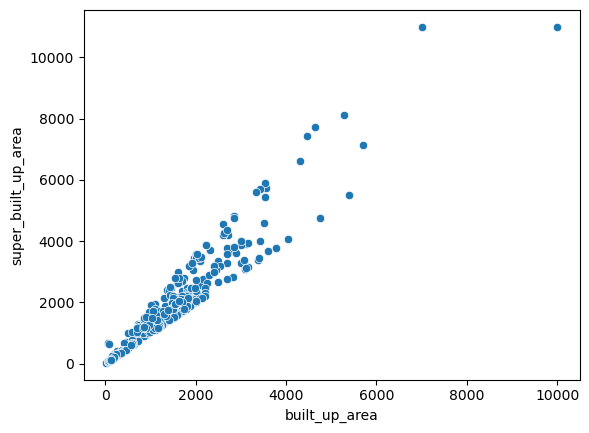

In [7]:
sns.scatterplot(df,x='built_up_area',y='super_built_up_area')

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

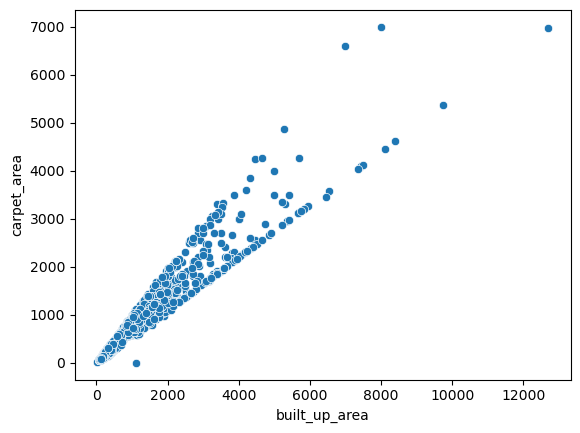

In [8]:
sns.scatterplot(df,x='built_up_area',y='carpet_area')

In [9]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
5815    False
5816    False
5817    False
5818    False
5819    False
Length: 5820, dtype: bool

In [10]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [11]:
all_present_df.shape

(649, 23)

In [12]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [13]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [14]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.25 0.8285714285714286


In [15]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [16]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,flat,arizona river heights,usmanpura,2.10,8910.0,2357.0,Super Built up area 2357(218.97 sq.m.)Carpet a...,3.0,3.0,2,11.0,East,Moderately Old,2357.0,NaN,1415.0,0.0,0.0,0.0,1.0,1.0,1.0,54.0
6,flat,harmony harikesh,science city,1.72,6300.0,2730.0,Super Built up area 2727(253.35 sq.m.)Carpet a...,3.0,3.0,1,15.0,West,Under Construction,2727.0,NaN,1636.0,0.0,0.0,1.0,0.0,0.0,0.0,76.0
19,flat,ld alexa,jagatpur,1.09,9175.0,1188.0,Super Built up area 219(183.11 sq.m.)Carpet ar...,3.0,3.0,1,11.0,East,New Property,219.0,NaN,132.0,0.0,0.0,1.0,1.0,0.0,0.0,65.0
22,flat,cloud 9,satellite,1.85,8061.0,2295.0,Super Built up area 2295(213.21 sq.m.)Carpet a...,3.0,3.0,1,11.0,North-West,New Property,2295.0,NaN,1300.0,1.0,0.0,0.0,1.0,0.0,0.0,190.0
27,flat,d r praharsh bluebell,south bopal,0.74,4123.0,1795.0,Super Built up area 1795(166.76 sq.m.)Carpet a...,3.0,3.0,1,13.0,East,Under Construction,1795.0,NaN,980.0,0.0,0.0,1.0,0.0,0.0,0.0,106.0


In [17]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.2) + (sbc_df['carpet_area']/0.85))/2),inplace=True)

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6056\569765207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.2) + (sbc_df['carpet_area']/0.85))/2),inplace=True)


In [18]:
df.update(sbc_df)

In [19]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 37
facing                 1634
agePossession             0
super_built_up_area    3318
built_up_area          2694
carpet_area            2455
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [20]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [21]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,flat,avirat silver harmony,gota,0.98,4840.0,2025.0,Super Built up area 2025(188.13 sq.m.),3.0,3.0,1,9.0,East,Moderately Old,2025.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,75.0
9,flat,vandanam aaryan,jagatpur,0.52,4622.0,1125.0,Super Built up area 1125(104.52 sq.m.),2.0,2.0,1,3.0,East,Under Construction,1125.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,50.0
11,flat,divyajivan lifestyle,nikol,0.23,3125.0,736.0,Super Built up area 720(66.89 sq.m.),1.0,2.0,1,4.0,East,Old Property,720.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,59.0
14,flat,shashwat zealous,chandkheda,0.38,3223.0,1179.0,Super Built up area 131(12.17 sq.m.),2.0,2.0,2,1.0,NaN,Moderately Old,131.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0
17,flat,b desai anand sapphire,gota,1.26,6335.0,1989.0,Super Built up area 1989(184.78 sq.m.),3.0,3.0,1,11.0,East,Relatively New,1989.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,140.0


In [22]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.205),inplace=True)

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6056\4108336686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.205),inplace=True)


In [23]:
df.update(sb_df)

In [24]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 37
facing                 1634
agePossession             0
super_built_up_area    3318
built_up_area          1548
carpet_area            2455
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [25]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [26]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,flat,satellite center,vastrapur,0.90,7143.0,1260.0,Carpet area: 140 (117.06 sq.m.),3.0,2.0,1,4.0,NaN,Old Property,NaN,NaN,140.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
7,flat,gurukul park society,memnagar,0.65,4981.0,1305.0,Carpet area: 145 (121.24 sq.m.),3.0,3.0,0,10.0,North,Old Property,NaN,NaN,145.0,0.0,0.0,0.0,0.0,1.0,2.0,24.0
13,flat,on request,motera,0.43,3069.0,1401.0,Carpet area: 1401 (130.16 sq.m.),2.0,2.0,2,3.0,North-East,Relatively New,NaN,NaN,1401.0,1.0,1.0,1.0,1.0,0.0,2.0,236.0
15,flat,amogha by adani realty,vaishnodevi circle,0.85,5743.0,1480.0,Carpet area: 1480 (137.5 sq.m.),3.0,3.0,1,6.0,NaN,New Property,NaN,NaN,1480.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
29,flat,shyam kutir,naroda,0.55,3892.0,1413.0,Carpet area: 1413 (131.27 sq.m.),3.0,3.0,1,2.0,East,Undefined,NaN,NaN,1413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.85),inplace=True)

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6056\1502780705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.85),inplace=True)


In [29]:
df.update(c_df)

In [30]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 37
facing                 1634
agePossession             0
super_built_up_area    3318
built_up_area             0
carpet_area            2455
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

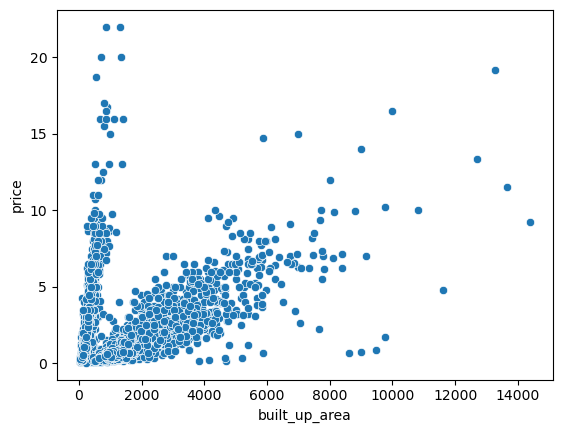

In [31]:
sns.scatterplot(df,x='built_up_area',y='price')

In [32]:
anamoly_df = df[(df['built_up_area'] < 1800) & (df['price'] > 1.5)][['price','area','built_up_area']]

In [33]:
anamoly_df.sample(5)

,price,area,built_up_area
5003,3.65,1764.0,300.0
4172,2.00,2475.0,228.0
3780,12.00,5400.0,706.0
1607,4.10,5625.0,520.0
3397,3.00,8721.0,969.0


In [34]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [35]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

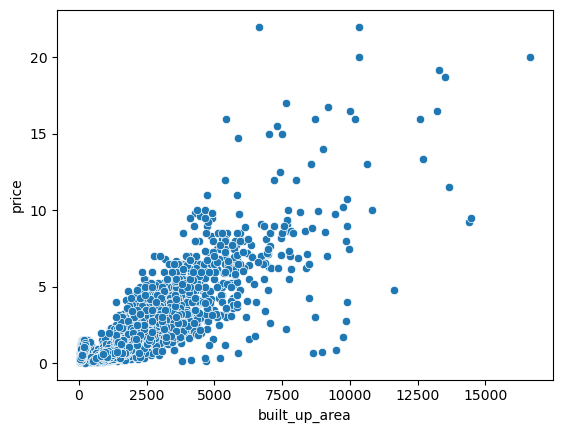

In [36]:
sns.scatterplot(df,x='built_up_area',y='price')

In [37]:
anamoly_df_2 = df[df['built_up_area']<500]

<Axes: xlabel='built_up_area', ylabel='area'>

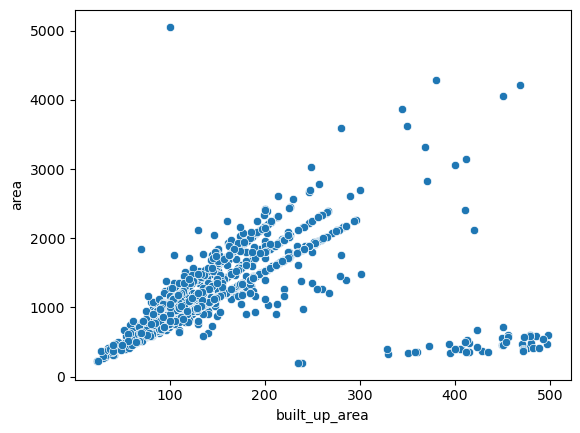

In [38]:
sns.scatterplot(anamoly_df_2,x='built_up_area',y='area')

In [39]:
anamoly_df_2['built_up_area'] = anamoly_df_2['area']

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6056\53125652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anamoly_df_2['built_up_area'] = anamoly_df_2['area']


In [40]:
df.update(anamoly_df_2)

In [41]:
# sns.distplot(df['built_up_area'])

In [42]:
temp = df[df['built_up_area']>4000]
# temp.to_csv('temp.csv')

In [43]:
temp[(df['price']<1)&(temp['bedRoom']<4)]

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6056\1481755152.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp[(df['price']<1)&(temp['bedRoom']<4)]


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
768,flat,orchid sky,shela,0.68,927.0,7335.0,Carpet area: 7332 (681.17 sq.m.),3.0,3.0,0,3.0,North,Relatively New,NaN,8626.0,7332.0,0.0,0.0,0.0,0.0,1.0,0.0,46.0
1554,flat,om shaantinagar 3 plus,vatva,0.21,595.0,3529.0,Carpet area: 3528 (327.76 sq.m.),2.0,2.0,2,3.0,East,New Property,NaN,4151.0,3528.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
1657,flat,paarijat vishwas,vatva,0.32,723.0,4426.0,Carpet area: 4425 (411.1 sq.m.),2.0,2.0,2,1.0,NaN,New Property,NaN,5206.0,4425.0,0.0,0.0,0.0,0.0,0.0,2.0,17.0
3606,flat,sitaram avenue,new ranip,0.68,1360.0,5000.0,Carpet area: 5000 (464.52 sq.m.),3.0,3.0,3,3.0,NaN,Old Property,NaN,5882.0,5000.0,0.0,0.0,0.0,1.0,0.0,0.0,41.0
3790,flat,bhagwat elegance,narol,0.17,412.0,4126.0,Carpet area: 4000 (371.61 sq.m.),1.0,1.0,1,7.0,NaN,Relatively New,NaN,4706.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
4881,flat,serene sparkles,south bopal,0.85,1055.0,8057.0,Carpet area: 8053 (748.15 sq.m.),3.0,2.0,1,7.0,West,Under Construction,NaN,9474.0,8053.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0
5343,flat,b kesar alanta,charodi,0.75,982.0,7637.0,Carpet area: 7635 (709.31 sq.m.),3.0,3.0,1,4.0,South-West,Relatively New,NaN,8982.0,7635.0,0.0,0.0,0.0,0.0,1.0,2.0,17.0
5761,flat,gopinath residency bapasitaram chowk,nava naroda,0.35,883.0,3964.0,Carpet area: 3960 (367.9 sq.m.),2.0,2.0,1,1.0,South,Old Property,NaN,4659.0,3960.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0


In [44]:
df.drop(index=temp[(temp['price']<1)&(temp['bedRoom']<4)].index,inplace=True)

In [45]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [46]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,gurukul,2.40,11111.0,3.0,3.0,3,3.0,North,Relatively New,2160.0,0.0,0.0,1.0,1.0,0.0,0.0,86.0
1,house,omkar bunglows,thaltej,4.75,15079.0,4.0,4.0,1,2.0,East,Old Property,3150.0,0.0,0.0,1.0,1.0,0.0,1.0,161.0
2,flat,sheeva amardeep enclave,nava naroda,0.27,2400.0,2.0,2.0,1,3.0,NaN,Undefined,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,arizona river heights,usmanpura,2.10,8910.0,3.0,3.0,2,11.0,East,Moderately Old,1814.0,0.0,0.0,0.0,1.0,1.0,1.0,54.0
4,flat,avirat silver harmony,gota,0.98,4840.0,3.0,3.0,1,9.0,East,Moderately Old,1680.0,0.0,0.0,1.0,0.0,0.0,0.0,75.0


In [47]:
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             37
facing             1631
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [48]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
30,house,independent,isanpur,0.65,5315.0,3.0,2.0,1,NaN,South-West,Old Property,1035.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
368,house,independent,maninagar,0.85,6296.0,3.0,3.0,2,NaN,NaN,Old Property,1350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,house,independent,thaltej,3.60,11429.0,3.0,4.0,0,NaN,South-East,Old Property,3150.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
658,house,independent,krishna nagar,0.51,4048.0,3.0,2.0,0,NaN,NaN,Relatively New,1260.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
756,house,ramya residency,shilaj,2.95,11501.0,3.0,3.0,1,NaN,NaN,Moderately Old,2565.0,0.0,0.0,1.0,1.0,0.0,0.0,78.0
788,house,navratna kalhaar bungalows,shilaj,7.25,15344.0,4.0,4.0,3+,NaN,East,Relatively New,4725.0,1.0,1.0,1.0,1.0,0.0,2.0,143.0
1037,house,"sugam villa, ghuma",ghuma,4.25,7496.0,4.0,4.0,2,NaN,NaN,Moderately Old,5670.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1314,house,independent,prahlad nagar,2.20,8015.0,4.0,4.0,1,NaN,NaN,Moderately Old,2745.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
1333,house,elegance bungalows,thaltej,3.50,17207.0,4.0,4.0,2,NaN,North-East,Moderately Old,2034.0,0.0,1.0,1.0,1.0,0.0,1.0,130.0
1368,house,"ratnaakar aravalli, shela",shela,8.50,16511.0,4.0,4.0,2,NaN,East,New Property,5148.0,1.0,1.0,0.0,1.0,0.0,0.0,196.0


In [49]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [50]:
df['floorNum'].fillna(2.0,inplace=True)

In [51]:
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1631
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [52]:
1011/df.shape[0]

0.1739504473503097

### facing

<Axes: ylabel='facing'>

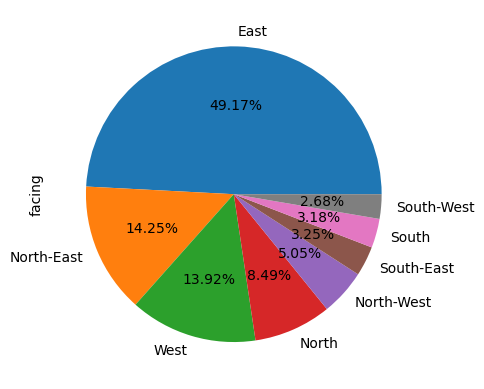

In [53]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [54]:
# df.drop(columns=['facing'],inplace=True)

In [55]:
df['facing'].fillna('NA',inplace=True)

In [56]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1065,flat,on request,south bopal,0.62,4960.0,2.0,2.0,1,10.0,South-East,Relatively New,1037.0,0.0,0.0,0.0,0.0,1.0,2.0,130.0
3306,house,pavan pushkar homes,vastral,0.80,9913.0,3.0,4.0,2,3.0,West,Moderately Old,1238.0,0.0,0.0,0.0,0.0,1.0,2.0,63.0
4807,house,independent,south bopal,1.80,9000.0,3.0,3.0,0,2.0,NA,Undefined,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4755,house,independent,gota,2.00,13889.0,3.0,3.0,0,2.0,NA,Undefined,1440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2634,house,independent,thaltej,2.70,10000.0,4.0,4.0,3,3.0,West,Relatively New,2700.0,0.0,0.0,1.0,1.0,0.0,1.0,98.0


In [57]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
facing             0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [58]:
df['agePossession'].value_counts()

Relatively New        1783
Moderately Old        1261
Old Property          1042
Under Construction     667
Undefined              534
New Property           525
Name: agePossession, dtype: int64

In [59]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,flat,sheeva amardeep enclave,nava naroda,0.27,2400.0,2.0,2.0,1,3.0,NA,Undefined,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,flat,shanti villa,naroda,0.45,2890.0,3.0,3.0,0,5.0,NA,Undefined,1557.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,flat,vishwanath vishwanath sarathya west,shela,0.75,4587.0,3.0,3.0,1,8.0,East,Undefined,1700.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0
29,flat,shyam kutir,naroda,0.55,3892.0,3.0,3.0,1,2.0,East,Undefined,1662.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,flat,shree sarju heights,chandkheda,0.70,4118.0,3.0,2.0,0,6.0,NA,Undefined,1700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754,flat,madhupuri elegance,maninagar,2.00,18034.0,3.0,3.0,1,5.0,NA,Undefined,1109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5763,flat,avirat silver harmony 2,gota,1.06,8333.0,3.0,3.0,2,8.0,NA,Undefined,1493.0,0.0,0.0,1.0,0.0,0.0,0.0,130.0
5770,flat,suryam ananta,vastral,0.66,4167.0,3.0,1.0,0,0.0,NA,Undefined,1584.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5774,house,independent,nikol,0.70,4375.0,3.0,2.0,0,2.0,NA,Undefined,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [61]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [62]:
df['agePossession'].value_counts()

Relatively New        1970
Moderately Old        1388
Old Property          1227
Under Construction     671
New Property           526
Undefined               30
Name: agePossession, dtype: int64

In [63]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [64]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [65]:
df['agePossession'].value_counts()

Relatively New        1983
Moderately Old        1402
Old Property          1230
Under Construction     671
New Property           526
Name: agePossession, dtype: int64

In [66]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
facing             0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [67]:
df.to_csv(interim_path / 'properties_missing_imputed.csv',index=False)

In [68]:
df.shape

(5812, 19)